## Medical Insurance Cost Prediction using Machine Learning

In [1]:
#importing libraries and dependencies

import xgboost as xgb
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import time

import warnings
warnings.filterwarnings("ignore")

In [2]:
# data collection and analysis

df = pd.read_csv(r"insurance.csv")

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
# number of rows and columns

df.shape

(1338, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


### Categorical Features:

-> Sex

-> Smoker

-> Region

In [6]:
# checking missing values

df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

### Data Analysis

In [7]:
# statistical analysis

df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


<Figure size 600x600 with 0 Axes>

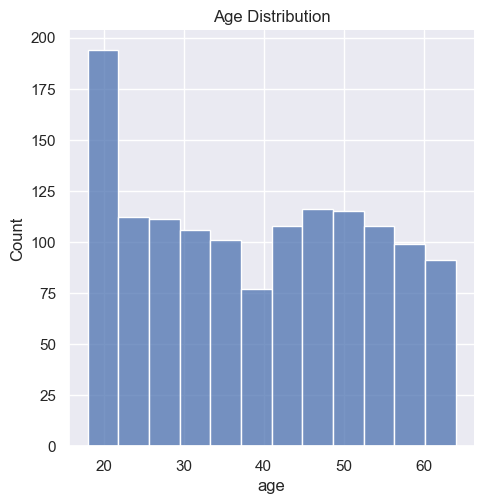

In [8]:
# distribution of age

sns.set()
plt.figure(figsize = (6,6))
sns.displot(df['age'])
plt.title('Age Distribution')
plt.show()

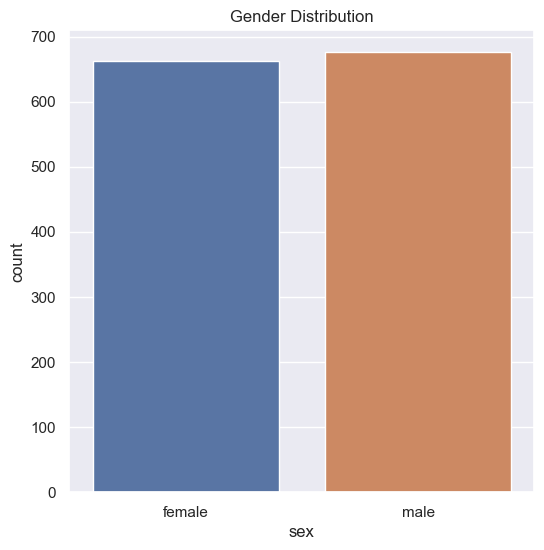

In [9]:
# distribution of gender

plt.figure(figsize = (6,6))
sns.countplot(x = 'sex', data = df)
plt.title('Gender Distribution')
plt.show()

In [10]:
df['sex'].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

<Figure size 600x600 with 0 Axes>

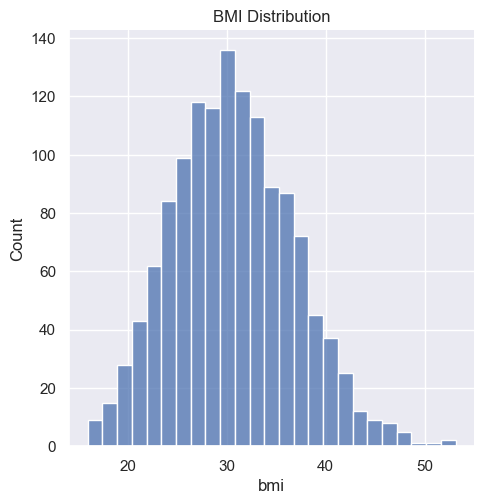

In [11]:
# distribution of BMI


plt.figure(figsize = (6,6))
sns.displot(df['bmi'])
plt.title('BMI Distribution')
plt.show()

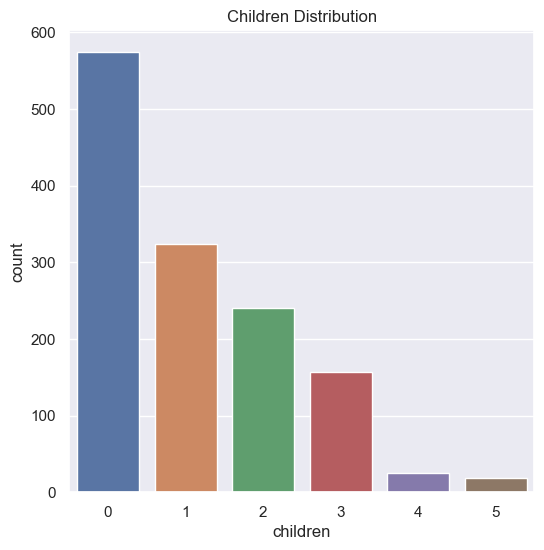

In [12]:
# distribution of children


plt.figure(figsize = (6,6))
sns.countplot(x = 'children', data = df)
plt.title('Children Distribution')
plt.show()

In [13]:
df['children'].value_counts()

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

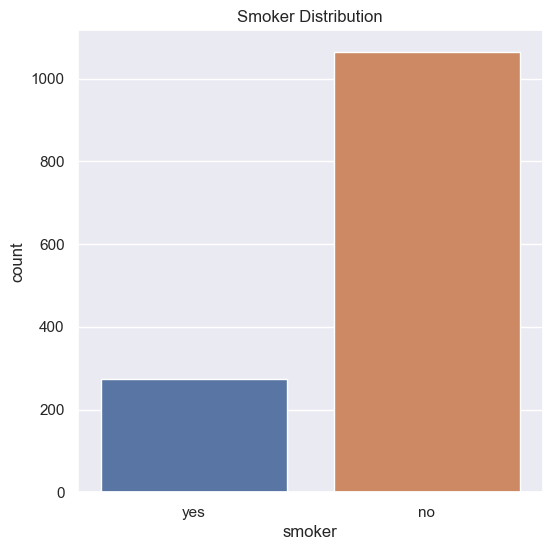

In [14]:
# distribution of smoker


plt.figure(figsize = (6,6))
sns.countplot(x = 'smoker', data = df)
plt.title('Smoker Distribution')
plt.show()

In [15]:
df['smoker'].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

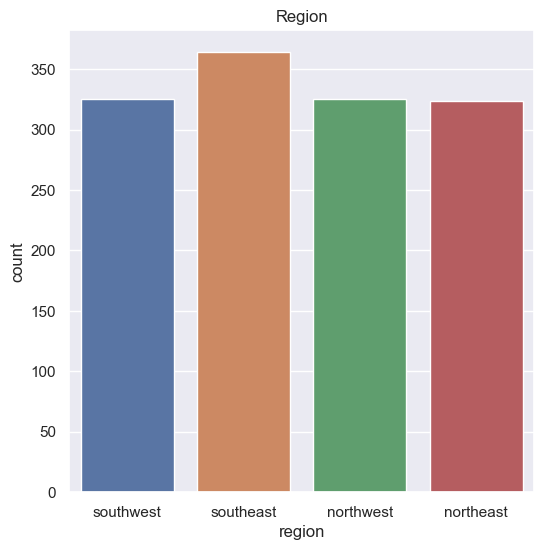

In [16]:
# distribution of smoker


plt.figure(figsize = (6,6))
sns.countplot(x = 'region', data = df)
plt.title('Region')
plt.show()

In [17]:
df['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

<Figure size 600x600 with 0 Axes>

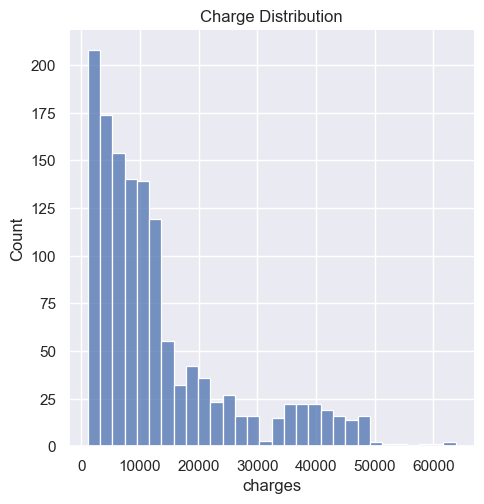

In [18]:
plt.figure(figsize = (6,6))
sns.displot(df['charges'])
plt.title('Charge Distribution')
plt.show()

### Data Preprocessing

#### Encoding the Categorical Features

In [19]:
# encoding sex column

df.replace({'sex':{'male': 0, 'female': 1}}, inplace= True)

# encoding smoker column

df.replace({'smoker':{'yes': 0, 'no': 1}}, inplace= True)


# encoding region column

df.replace({'region':{'southeast': 0, 'southwest': 1, 'northeast': 2, 'northwest': 3 }}, inplace= True)

In [20]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,1,16884.92400
1,18,0,33.770,1,1,0,1725.55230
2,28,0,33.000,3,1,0,4449.46200
3,33,0,22.705,0,1,3,21984.47061
4,32,0,28.880,0,1,3,3866.85520


#### Splitting the Features and Target

In [21]:
X = df.drop(columns = 'charges', axis = 1)
y = df['charges']

In [22]:
print(X)

      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       0       1
1      18    0  33.770         1       1       0
2      28    0  33.000         3       1       0
3      33    0  22.705         0       1       3
4      32    0  28.880         0       1       3
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       1       3
1334   18    1  31.920         0       1       2
1335   18    1  36.850         0       1       0
1336   21    1  25.800         0       1       1
1337   61    1  29.070         0       0       3

[1338 rows x 6 columns]


In [23]:
print(y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


#### Split in Train Test Data

In [24]:
X_train, X_test, y_train,  y_test = train_test_split(X, y, test_size = 0.2,
                                                    random_state = 2 )

In [25]:
print(X.shape, X_train.shape, X_test.shape)

(1338, 6) (1070, 6) (268, 6)


#### Model Training

In [58]:
#Linear Regression
start = time.time()
lr_clf = LinearRegression()
lr_clf.fit(X_train, y_train)
end = time.time()
print(f"Runtime {end-start}")

Runtime 0.004362344741821289


In [59]:
#XGBoost

start = time.time()
xgb_clf = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=10, random_state=30)
xgb_clf.fit(X_train, y_train)
end = time.time()
print(f"Runtime {end-start}")

Runtime 0.02097177505493164


#### Model Evaluation

In [51]:
# R squared value [0~1] and MSE on train data using Linear Regression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

train_data_pred = lr_clf.predict(X_train)
r2_train = r2_score(y_train, train_data_pred)
mse = mean_squared_error(y_train, train_data_pred)
print('R-Squared value on train data:', r2_train)
print('Mean Squared value on train data:', mse)

R-Squared value on train data: 0.751505643411174
Mean Squared value on train data: 36174978.42709207


In [52]:
# R squared value [0~1] and MSE on train data using Linear Regression

test_data_pred = lr_clf.predict(X_test)
r2_test = metrics.r2_score(y_test, test_data_pred)
mse = mean_squared_error(y_test, test_data_pred)
print('R-Squared value on test data:', r2_test)
print('Mean Squared value on train data:', mse)

R-Squared value on test data: 0.7447273869684077
Mean Squared value on train data: 38337035.48643883


In [53]:
# R squared value [0~1] and MSE on train data using XGBoost


train_data_pred = xgb_clf.predict(X_train)
r2_train = metrics.r2_score(y_train, train_data_pred)
mse = mean_squared_error(y_train, train_data_pred)
print('R-Squared value on train data:', r2_train)
print('Mean Squared value on train data:', mse)

R-Squared value on train data: 0.9967362176093564
Mean Squared value on train data: 475130.5389506992


In [54]:
# R squared value [0~1] and MSE on test data using XGBoost

test_data_pred = xgb_clf.predict(X_test)
r2_test = metrics.r2_score(y_test, test_data_pred)
mse = mean_squared_error(y_test, test_data_pred)
print('R-Squared value on test data:', r2_test)
print('Mean Squared value on train data:', mse)

R-Squared value on test data: 0.8144316777193814
Mean Squared value on train data: 27868792.00218221


### Building a predictive system

In [62]:
# LR Model

input_data = (31,1,25.74,0,1,0)

# changing input_data to a numpy array

input_data_as_numpy_array = np.asarray(input_data)

# reshape the array
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

prediction = lr_clf.predict(input_data_reshaped)
print(prediction)
print('The insurance cost is USD ', round(prediction[0], 2))

[3760.0805765]
The insurance cost is USD  3760.08


In [61]:
#XGBoost Model

input_data = (31,1,25.74,0,1,0)

# changing input_data to a numpy array

input_data_as_numpy_array = np.asarray(input_data)

# reshape the array

input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

prediction = lr_clf.predict(input_data_reshaped)
print(prediction)
print('The insurance cost is USD ', round(prediction[0], 2))

[3760.0805765]
The insurance cost is USD  3760.08


## Thus we can conclude that both XGBoost and Linear Regression give same prediction but Linear Regression achieves this with lesser time overhead
